## Value Added Modeling
The IDD calculated by INEP at heart is a very simple form of value added modeling (VAM). Let's try to understand how VAM is suppossed to work. We aim to estimate the contribution of course characteristics to outcome measurements. 

True coefficients: [20, 0.1]


<AxesSubplot:xlabel='IV1', ylabel='DV'>

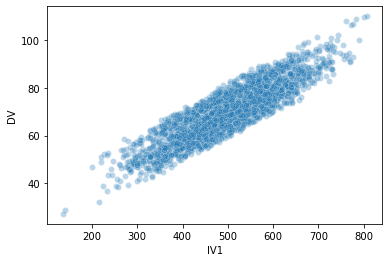

In [1]:
from pymer4.simulate import simulate_lmm
import seaborn as sns
import pandas as pd

num_obs = 50
num_coef = 1
num_grps = 50
mus = [500]
sigmas = [100]
coef_vals = [20,0.1]
grp_sigmas = [5,0]
#corrs = 1

data, blups, b = simulate_lmm(num_obs,
                      num_coef,
                      num_grps,
                      coef_vals = coef_vals,
                      mus = mus,
                      sigmas = sigmas,
                      grp_sigmas = grp_sigmas
                     )

print("True coefficients: {}".format(b))
data['Group'] = data["Group"].apply(lambda x:'Group-' + str(x))
sns.scatterplot(data=data,x='IV1',y='DV',alpha=0.3)

In [2]:
blups

,Intercept,IV1
Grp1,21.891369,0.1
Grp2,27.409246,0.1
Grp3,18.931344,0.1
Grp4,23.171241,0.1
Grp5,15.178946,0.1
Grp6,24.623961,0.1
Grp7,14.193660,0.1
Grp8,19.507718,0.1
Grp9,17.607364,0.1
Grp10,12.976931,0.1


In [45]:
from pymer4.models import Lmer
model = Lmer('DV ~ IV1 + (1|Group)',data=data)
model.fit()

Formula: DV ~ IV1 + (1|Group)

Family: gaussian	 Inference: parametric

Number of observations: 2500	 Groups: {'Group': 50.0}

Log-likelihood: -3780.819 	 AIC: 7561.638

Random effects:

                 Name     Var    Std
Group     (Intercept)  23.631  4.861
Residual                1.042  1.021

No random effect correlations specified

Fixed effects:



,Estimate,2.5_ci,97.5_ci,SE,DF,T-stat,P-val,Sig
(Intercept),20.219,18.856,21.582,0.695,51.236,29.071,0.0,***
IV1,0.100,0.100,0.100,0.000,2449.104,482.914,0.0,***


In [47]:
model = Lmer('DV ~ (1|Group)',data=data)
model.fit()

Formula: DV ~ (1|Group)

Family: gaussian	 Inference: parametric

Number of observations: 2500	 Groups: {'Group': 50.0}

Log-likelihood: -9369.037 	 AIC: 18738.075

Random effects:

                 Name      Var     Std
Group     (Intercept)   23.247   4.822
Residual               100.238  10.012

No random effect correlations specified

Fixed effects:



,Estimate,2.5_ci,97.5_ci,SE,DF,T-stat,P-val,Sig
(Intercept),70.113,68.72,71.506,0.711,49.0,98.658,0.0,***


In [50]:
data.groupby("Group").agg({'DV':['mean','std']})

DV           
                 mean        std
Group                           
Group-1.0   64.432079  10.958314
Group-10.0  72.464213  11.427239
Group-11.0  67.876517   9.684265
Group-12.0  71.841370  10.028533
Group-13.0  71.906543   9.139908
Group-14.0  68.091404  11.323632
Group-15.0  74.811609  11.513327
Group-16.0  71.877262   9.224072
Group-17.0  74.317329  11.354475
Group-18.0  72.777256   8.454622
Group-19.0  72.621685  10.943308
Group-2.0   68.132940   9.518962
Group-20.0  69.189349  10.068908
Group-21.0  68.686844   9.532762
Group-22.0  73.397100   9.923753
Group-23.0  74.696279   9.167939
Group-24.0  73.048413   8.796875
Group-25.0  61.743168   9.245024
Group-26.0  74.465951   9.310095
Group-27.0  69.922381   9.547884
Group-28.0  67.549346  10.038343
Group-29.0  70.643139   9.743768
Group-3.0   76.380270   7.868898
Group-30.0  76.547494   9.769400
Group-31.0  64.280618   9.473049
Group-32.0  60.817601  10.644811
Group-33.0  69.291543  10.215824
Group-34.0  72.875466   9.478330
Group-35.0  66.128325   9.079975
Group-36.0  79.598676   9.965386
Group-37.0  65.433529   9.429339
Group-38.0  77.943937  11.570721
Group-39.0  70.366731  13.361823
Group-4.0   66.204633   8.993207
Group-40.0  72.846403  10.658906
Group-41.0  63.880184   9.454623
Group-42.0  70.662012  10.860312
Group-43.0  70.533771   8.247286
Group-44.0  59.571769  10.054291
Group-45.0  69.196967  11.451797
Group-46.0  66.037177   8.727010
Group-47.0  70.477104   9.510602
Group-48.0  58.097896  10.535924
Group-49.0  81.418535  10.684452
Group-5.0   72.680460  10.838889
Group-50.0  70.653148   8.713805
Group-6.0   60.605200  10.914089
Group-7.0   73.539912   9.539267
Group-8.0   73.679497  10.260551
Group-9.0   71.393761   8.668908